# Analysis of fMRI Stability Scans

The fMRI Stability scans at CRIC are based on the fBIRN protocols, which are an adaptation of the published methods of [Friedman and Glover 2006](http://www.ncbi.nlm.nih.gov/pubmed/16649196).
The routine analysis uses the BIRN code and the scans are of a spherical phantom based on that used by BIRN.
The BIRN software and protocols are available at:

- [BIRN](http://www.birncommunity.org/tools-catalog/function-birn-stability-phantom-qa-procedures/)
- [New BHX Xcede Tools](http://www.nitrc.org/projects/bxh_xcede_tools)
- [BHX Tools Docs](https://xwiki.nbirn.org:8443/bin/view/Function-BIRN/AutomatedQA)

This notebook uses locally implemented equivalents of the BIRN analysis routines and presents more detailed results for the current scans. The results may be compared with those obtained by the standard BIRN analysis.

## Obtaining QA Scans

We have the FMRI QA scans in the test data. This is the long term stability series `ep2d_fbirn_20min` a long EPI time series (600 timepoints at intervals of 2s). For Siemens VE11 each timepoint is a Siemens mosaic image which we'll unpack to a volume. For Siemens XA we have an enhanced dicom multiframe at each timepoint. For GE each slice at each timepoint is an independent dicom object. For Philips a single multiframe encompasses all the timepoints.

In [1]:
import sys
from os.path import abspath, join
from glob import glob
from pydicom import dcmread

# The analysis library
sys.path.insert(0, abspath('..'))

from mriqa.reports import fbirn_short_report, fbirn_full_report
from dcmfetch import fetch_series

## Siemens VE11

Fluctuations  FittedDrift    Ghosts  BrightGhosts  \
CRIC45064_20111212      0.053008     1.050222  4.314646     10.818958   

                     SignalMean         SNR        SFNR  
CRIC45064_20111212  1433.586841  372.215846  374.374229

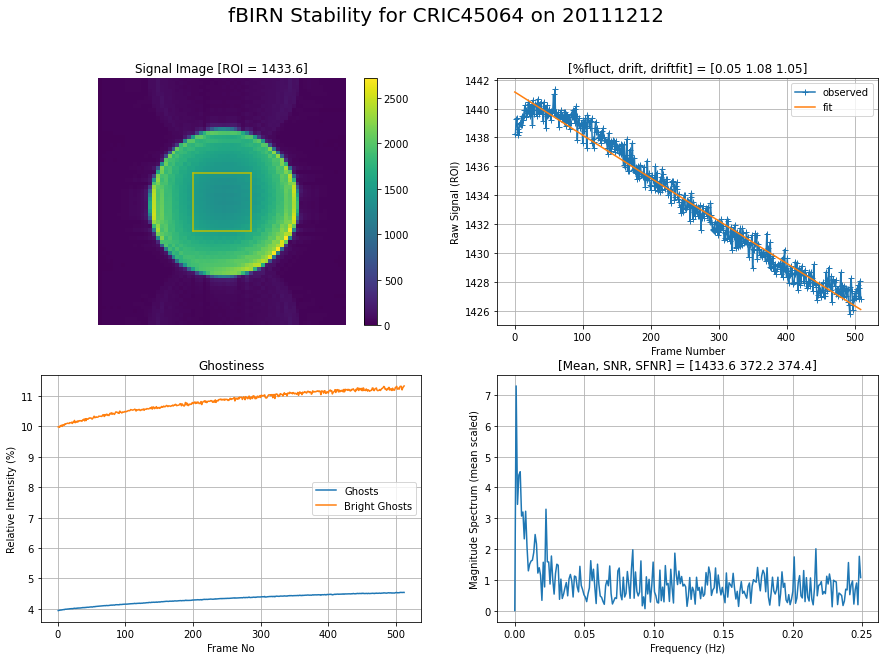

In [2]:
imagedir = '../../tests/test-data/fbirn/siemens/dicom'

dobjs = sorted((dcmread(f) for f in glob(join(imagedir, '*.dcm'))), key=lambda d: float(d.AcquisitionTime))
results = fbirn_short_report(dobjs)
results

Fluctuations  FittedDrift    Ghosts  BrightGhosts  \
CRIC45064_20111212      0.053008     1.050222  4.314646     10.818958   

                     SignalMean         SNR        SFNR  
CRIC45064_20111212  1433.586841  372.215846  374.374229

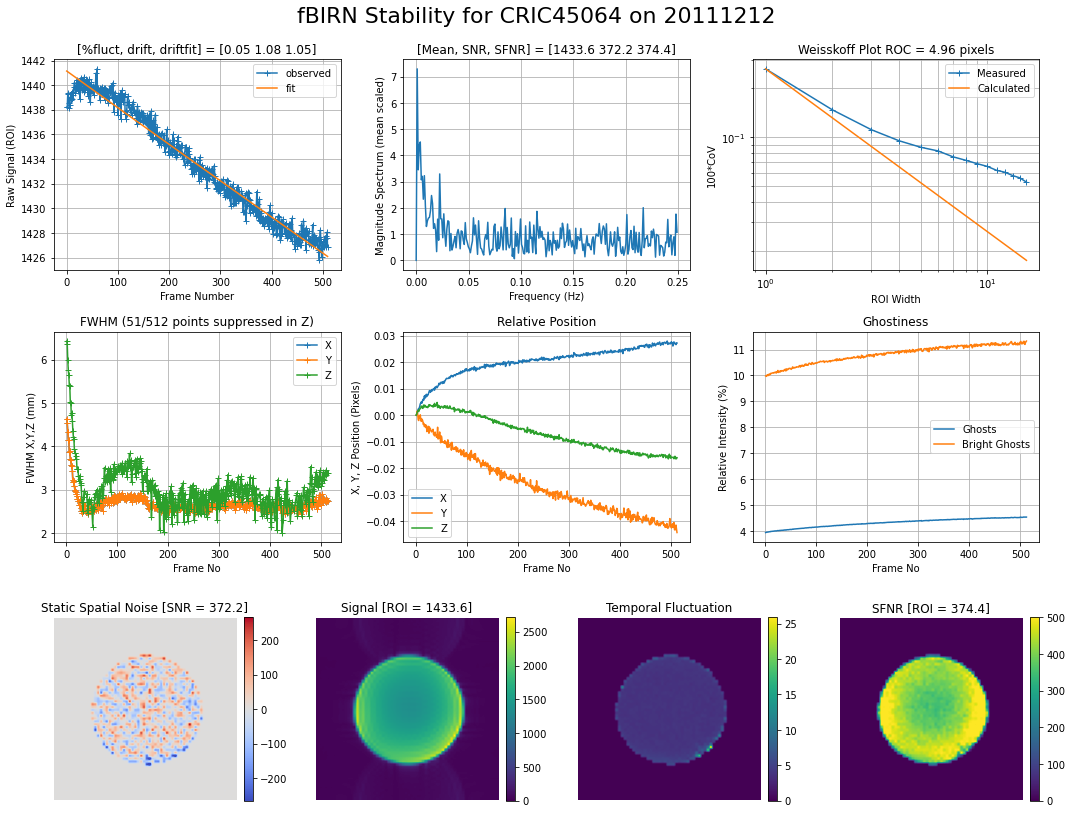

In [3]:
results = fbirn_full_report(dobjs)
results

## GE

Fluctuations  FittedDrift    Ghosts  BrightGhosts  \
MRL1R1_20140710       0.07997     0.401918  1.203407      5.605578   

                  SignalMean        SNR       SFNR  
MRL1R1_20140710  4336.274736  331.05212  315.06849

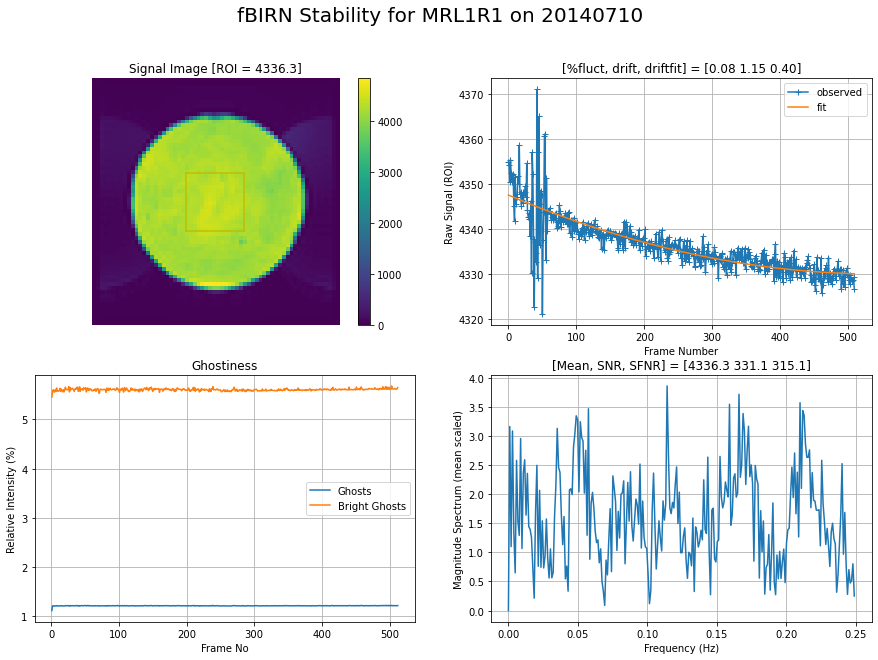

In [4]:
imagedir = '../../tests/test-data/fbirn/ge/dicom'

dobjs = sorted((dcmread(f) for f in glob(join(imagedir, '*.dcm'))), key=lambda d: float(d.AcquisitionTime))
results = fbirn_short_report(dobjs)
results

Fluctuations  FittedDrift    Ghosts  BrightGhosts  \
MRL1R1_20140710       0.07997     0.401918  1.203407      5.605578   

                  SignalMean        SNR       SFNR  
MRL1R1_20140710  4336.274736  331.05212  315.06849

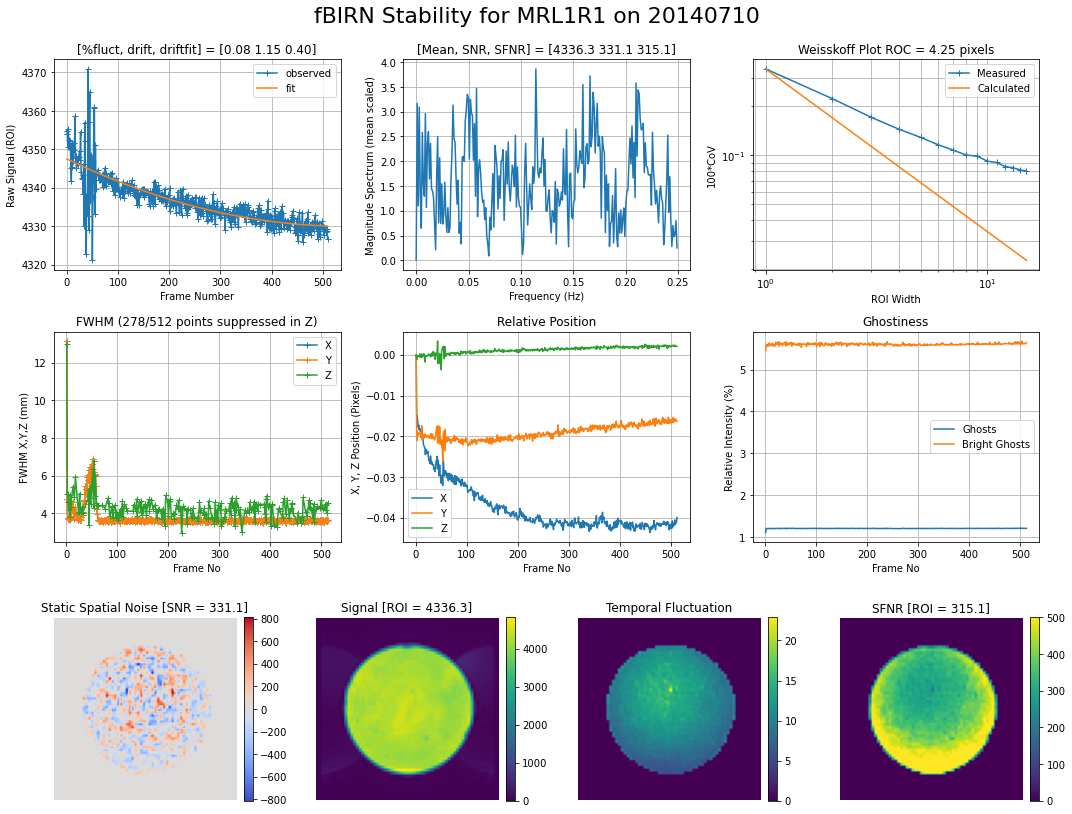

In [5]:
results = fbirn_full_report(dobjs)
results

## Philips

Fluctuations  FittedDrift   Ghosts  BrightGhosts  \
PHILIPS-238B420_20140325      0.155803     1.596003  1.08454      6.403926   

                           SignalMean         SNR        SFNR  
PHILIPS-238B420_20140325  1988.695399  446.046841  243.932249

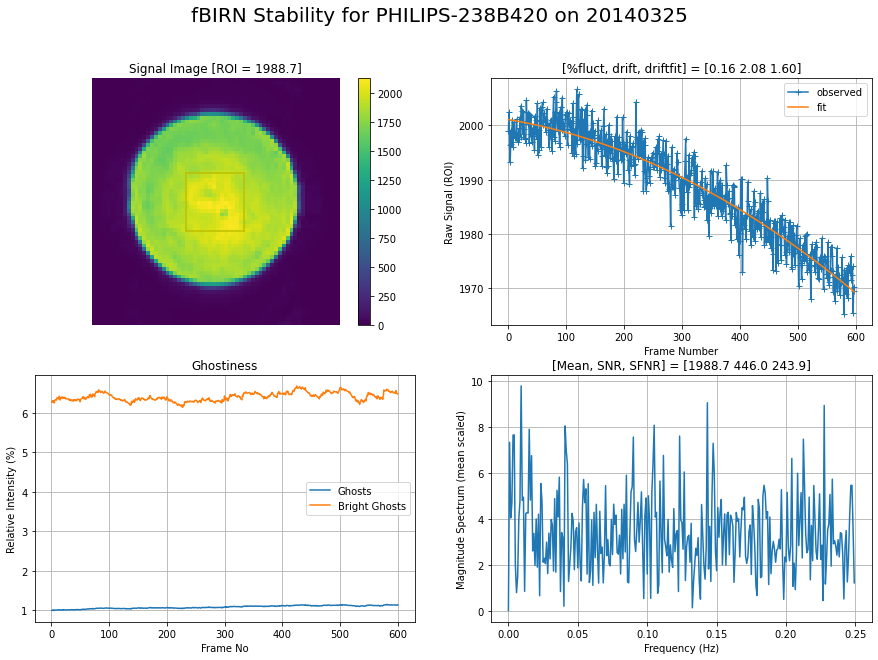

In [6]:
imagedir = '../../tests/test-data/fbirn/philips/dicom'

dobjs = sorted((dcmread(f) for f in glob(join(imagedir, '*.dcm'))), key=lambda d: float(d.AcquisitionTime) if 'AcquisitionTime' in d else 0)
results = fbirn_short_report(dobjs)
results

Fluctuations  FittedDrift   Ghosts  BrightGhosts  \
PHILIPS-238B420_20140325      0.155803     1.596003  1.08454      6.403926   

                           SignalMean         SNR        SFNR  
PHILIPS-238B420_20140325  1988.695399  446.046841  243.932249

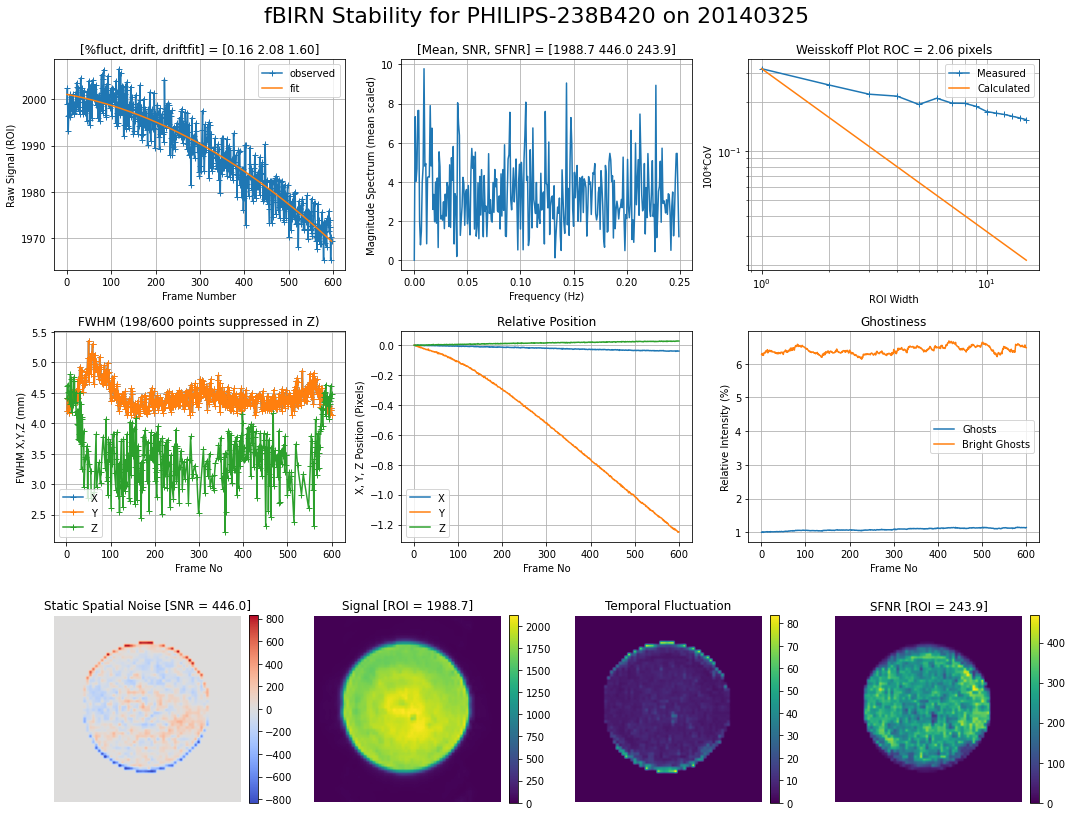

In [7]:
results = fbirn_full_report(dobjs)
results

## Siemens XA

Fluctuations  FittedDrift    Ghosts  BrightGhosts  \
AWP196245_20200115      0.058662     1.432358  2.961375      8.172196   

                    SignalMean         SNR       SFNR  
AWP196245_20200115  969.618514  354.116044  88.176128

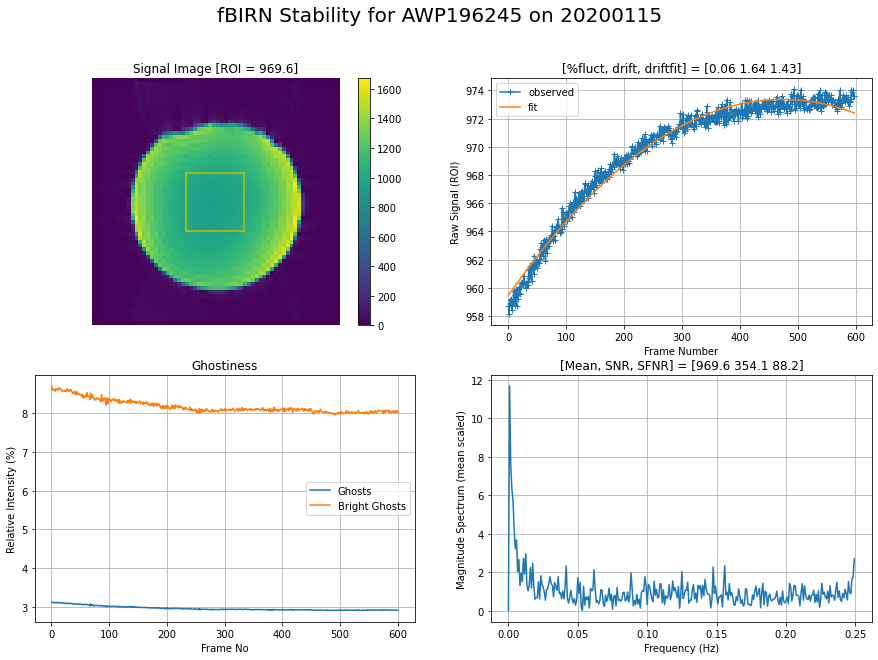

In [8]:
imagedir = '../../tests/test-data/fbirn/siemensxa/dicom'

dobjs = sorted((dcmread(f) for f in glob(join(imagedir, '*.dcm'))), key=lambda d: float(d.AcquisitionTime) if 'AcquisitionTime' in d else 0)
results = fbirn_short_report(dobjs)
results

Fluctuations  FittedDrift    Ghosts  BrightGhosts  \
AWP196245_20200115      0.058662     1.432358  2.961375      8.172196   

                    SignalMean         SNR       SFNR  
AWP196245_20200115  969.618514  354.116044  88.176128

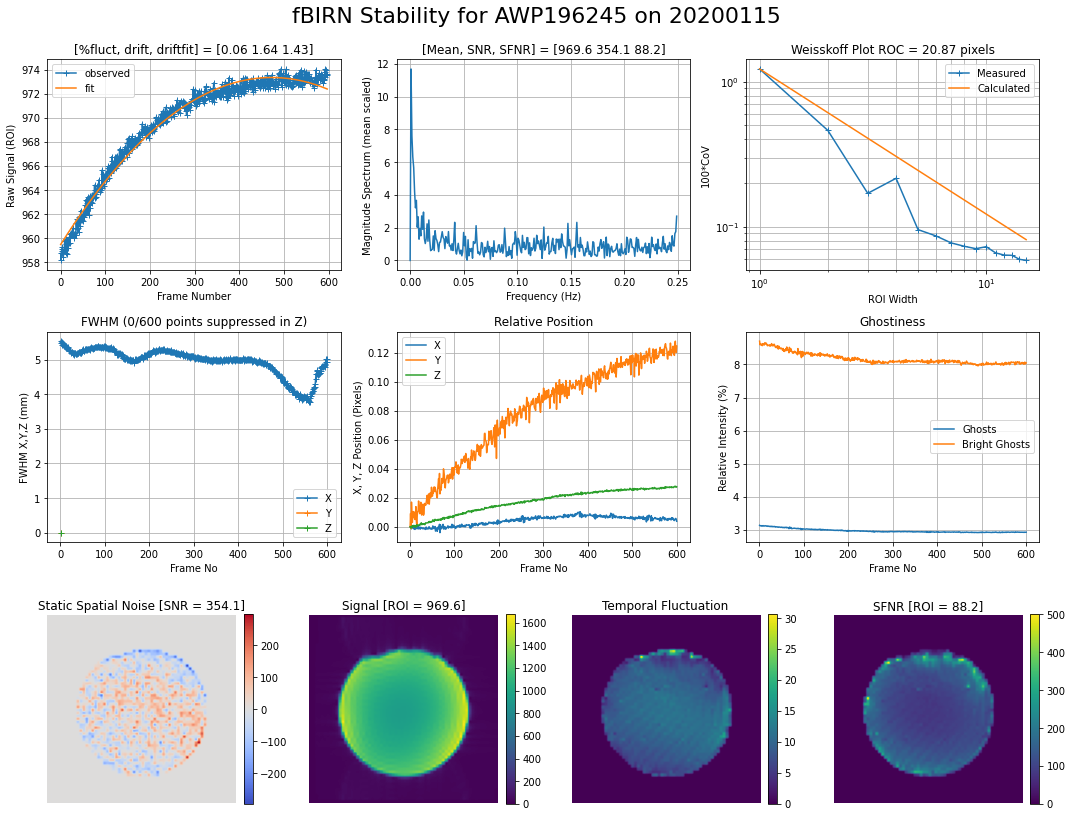

In [9]:
results = fbirn_full_report(dobjs)
results